## Bay Wheels Bike Sharing System Usage Pattern 2019/2020

#### by Simer Anand

## Investigation Overview

> [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. 

## Dataset Overview

> The dataset we have used in this exploration analysis comprises of the last 12 months of the data i.e., from September, 2019 to August, 2020. The dataset for each month is made availabe by Bay wheels on its website [baywheels](https://s3.amazonaws.com/baywheels-data/index.html), the data is available in CSV format. For this analysis, the extracted data have been wrangled and cleaned to explore and visualise relationship between different columns of data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import plotly.express as px
import seaborn as sb
import os
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [2]:
# load in the dataset into a pandas dataframe
# file name : fordbike_master.csv

bike_df = pd.read_csv('fordbike_master.csv')

<span style='color:Blue'>1. Number of riders on monthly basis and what is the impact of the Covid-19 on the bike rides?</span>

<span style='color:Blue'>	(i) Last 12 months of data from `September, 2019` to `August, 2020`.</span>

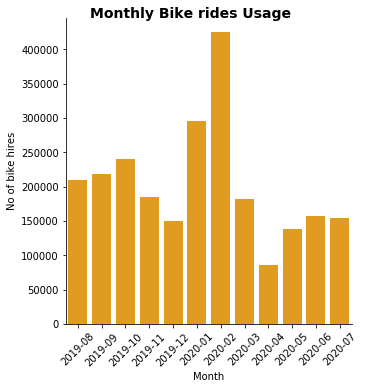

In [3]:
header = '1. Number of riders on monthly basis and what is the impact of the Covid-19 on the bike rides?'
printmd(header, color='Blue')

header = '\t(i) Last 12 months of data from `September, 2019` to `August, 2020`.'
printmd(header, color='Blue')

graph = sb.catplot(data=bike_df.sort_values(by='month_year'), x='month_year', kind='count', color='orange')
graph.set_axis_labels("Month", "No of bike hires")
graph.fig.suptitle('Monthly Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 45);

Given the data and the current situation due to `COVID-19` lockdowns across the US. As you can see in the below graphs the number of rides were `growing` from `September in the 2019` and in the `first two months of the 2020` and ridership numbers `fell` in `March` and dipped further in the `April`. Since `April` the ridership is `gradually increasing` but still half of what we saw in the first two months of the `2020`.

<span style='color:Blue'>(ii) Data only from the year 2020 to see closely the impact of the covid,</span>

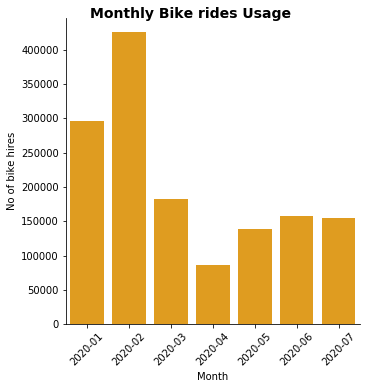

In [4]:
header = '(ii) Data only from the year 2020 to see closely the impact of the covid,'
printmd(header, color='Blue')
graph = sb.catplot(data=bike_df.query('month_year > "2019-12"').sort_values(by='month_year'), x='month_year', kind='count', color='orange')
graph.set_axis_labels("Month", "No of bike hires")
graph.fig.suptitle('Monthly Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 45);


<span style='color:Blue'>2. Number of riders on hour basis on an average day?</span>

<span style='color:Blue'>(i) Hourly all time trend of bike users.</span>

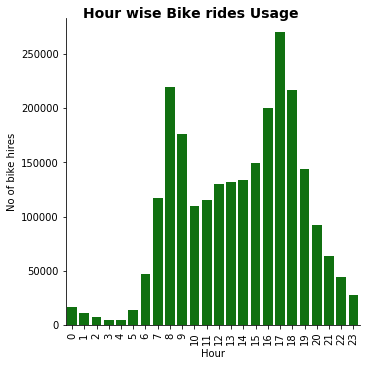

In [5]:
header = '2. Number of riders on hour basis on an average day?'
printmd(header, color='Blue')

header = '(i) Hourly all time trend of bike users.'
printmd(header, color='Blue')

graph = sb.catplot(data=bike_df, x='hour', kind='count', color='green')
graph.set_axis_labels("Hour", "No of bike hires")
graph.fig.suptitle('Hour wise Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 90);

Want to see what the hourly usage of the bike looks like on any day for all type of the users. `50000` riders in the morning `6am` and the number increases to quater million bike rides by `8am`. Through this visualisation we see most of the users are before the business hour and after the business hours. Peak usages are before `9 AM` and after `5 PM`. 

<span style='color:Blue'>(ii) Curious to know if the trend in the post COVID-19 error.</span>

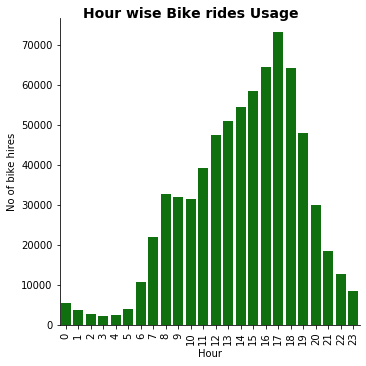

In [6]:
header = '(ii) Curious to know if the trend in the post COVID-19 error.'
printmd(header, color='Blue')

graph = sb.catplot(data=bike_df.query('month_year > "2020-02"'), x='hour', kind='count', color='green')
graph.set_axis_labels("Hour", "No of bike hires")
graph.fig.suptitle('Hour wise Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 90);

Interestingly, the visual below tells us in the COVID-19 era especially from months `March till August`, we see the peak times have shifted to the end of the day, what we see is `Negative Skewness`.

<span style='color:Blue'>3. Number of the users and their methods to access the bike?</span>

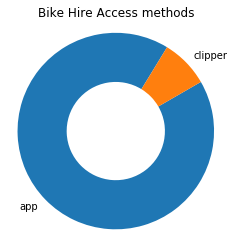

In [7]:
header = '3. Number of the users and their methods to access the bike?'
printmd(header, color='Blue')

sorted_counts = bike_df['rental_access_method'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 30,
        counterclock = False, wedgeprops = {'width' : 0.5});
plt.title('Bike Hire Access methods')
plt.axis('square');


So we know from the Visual below that the users can use either mobile `App` or `Clipper` to access the bike. 
More than `90%` of the users prefer using the `App`.

<span style='color:Blue'>4. Different users and their ridership, what does their running time differentiate?</span>

<span style='color:Blue'>(i) Lets see who rides more for lesser duration?</span>

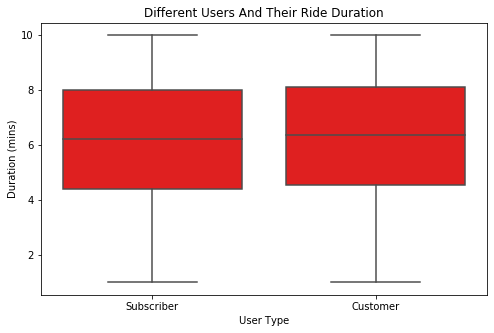

In [8]:
header = '4. Different users and their ridership, what does their running time differentiate?'
printmd(header, color='Blue')

header = '(i) Lets see who rides more for lesser duration?'
printmd(header, color='Blue')

plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = bike_df.query('duration_mins < 10'), x = 'user_type', y = 'duration_mins', color = 'red')
plt.title('Different Users And Their Ride Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.show()

For the sake of the analysis, I choose the 10 mins duration and before visual represents the user type riding the bike for less than 10 mins. We see the median number for the number `Subscriber's` riding bike `less than 10 mins` is higher than the `Customer`.

<span style='color:Blue'>(ii) What type of the users rides for longer duraion?</span>

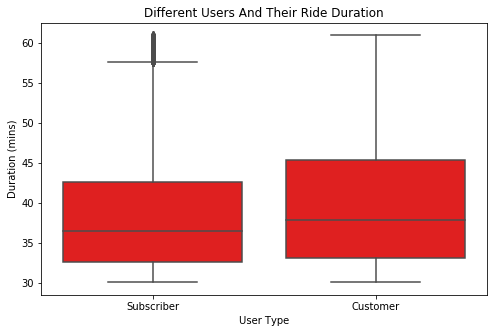

In [9]:
header = '(ii) What type of the users rides for longer duraion?'
printmd(header, color='Blue')

plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = bike_df.query('duration_mins > 30 and duration_mins < 61'), x = 'user_type', y = 'duration_mins', color = 'red')
plt.title('Different Users And Their Ride Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.show()

For the sake of the analysis, I choose the timeframe of `minimum of ride time being 10 mins and max being 60 mins`. From the visual below the story its telling is different from the one we saw with ride time being less than `10 mins`. Here we see the median number of the  `Non-Subscribers` riders is higher than that of the `Subscribers`.

<span style='color:Blue'>(iii) While we are at it, checking the duration for the each user type and we are looking for interesting data from COVID-19 era, what the visual changes are to the above two graphs in the months after `March-20`?</span>

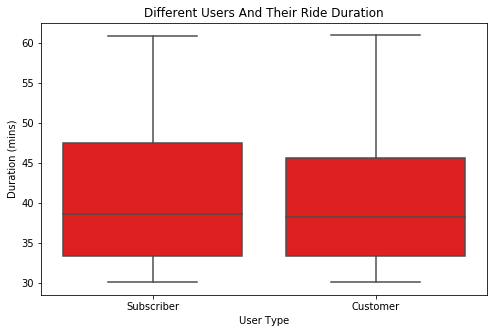

In [10]:
header = '(iii) While we are at it, checking the duration for the each user type and we are looking for interesting data from COVID-19 era, what the visual changes are to the above two graphs in the months after `March-20`?'
printmd(header, color='Blue')


plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = bike_df.query('month_year > "2020-02"').query('duration_mins > 30 and duration_mins < 61'), x = 'user_type', y = 'duration_mins', color = 'red')
plt.title('Different Users And Their Ride Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.show()

We see a different story, what I understand is the non-subscribers are using the bike lesser duration since the COVID-19 outbreak. Median duration for the Subscriber duration is slightly higher than the non-subscriber, which is opposite of what seen before COVID.

In [11]:
# lets make the two sub dataframe one contains the rows with user_type being Customer and other with Subscriber.
subs_df = bike_df.query('user_type == "Subscriber"')
cust_df = bike_df.query('user_type == "Customer"')


# find out the number of Subscribers using the App and Clipper and put them in two different variables.
subs_rider_using_app = subs_df.query('rental_access_method == "app"').rental_access_method.count()
subs_rider_using_clipper = subs_df.query('rental_access_method == "clipper"').rental_access_method.count()

# Add above two and find the proportion of the Subscriber using the clipper and App.
total_subs_rider = subs_rider_using_app + subs_rider_using_clipper
subs_rider_using_app_prop = subs_rider_using_app / total_subs_rider
subs_rider_using_clipper_prop = subs_rider_using_clipper / total_subs_rider

# find out the number of `Customer` type riders using the App and Clipper and put them in two different variables.
cust_rider_using_app = cust_df.query('rental_access_method == "app"').rental_access_method.count()
cust_rider_using_clipper = cust_df.query('rental_access_method == "clipper"').rental_access_method.count()

# Add above two and find the proportion of the Customer using the clipper and App.
total_cust_rider = cust_rider_using_app + cust_rider_using_clipper
cust_rider_using_app_prop = cust_rider_using_app / total_cust_rider
cust_rider_using_clipper_prop = cust_rider_using_clipper / total_cust_rider

# Putting all the variables and their Values into a dictionary,
proportion_data = {'user_type': ['Subscriber', 'Customer'], 
                   'Clipper': [subs_rider_using_clipper_prop, cust_rider_using_clipper_prop],
                   'App': [subs_rider_using_app_prop, cust_rider_using_app_prop]
                  }

# Creating a dataframe of the proportion values gathered from above.
proportion_df = pd.DataFrame.from_dict(proportion_data)



<span style='color:Blue'>5. What is share of the different user type and their way of accessing the bike hire using App?</span>



	User Type vs App Hire Method Proportion


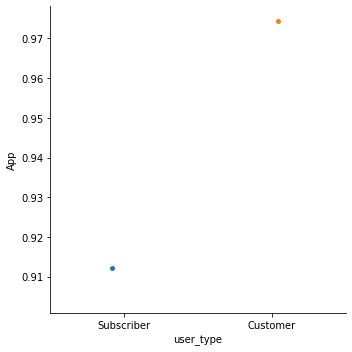

In [12]:
# Plotting the above dataframe with the proportion values.
header = '5. What is share of the different user type and their way of accessing the bike hire using App?'
printmd(header, color='Blue')

print('\n\n\tUser Type vs App Hire Method Proportion')
graph = sb.catplot(data=proportion_df, x="user_type", y="App");

- As seen in the above graph, we know the answer to our question
- `Customer` type users are more likely to use the `App` than the `Subscribers`.

<span style='color:Blue'>6. What is share of the different user type and their way of accessing the bike hire using Clipper?</span>



	User Type vs Clipper Hire Method Proportion


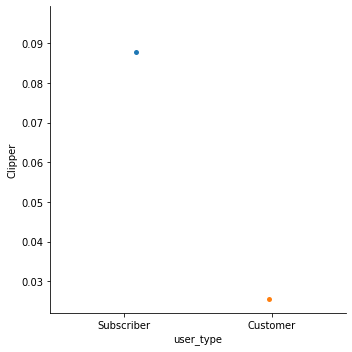

In [13]:
header = '6. What is share of the different user type and their way of accessing the bike hire using Clipper?'
printmd(header, color='Blue')

print('\n\n\tUser Type vs Clipper Hire Method Proportion')
graph = sb.catplot(data=proportion_df, x="user_type", y="Clipper");

- As seen in the above graph, we know the answer to our question
- `Subscriber` type users are more likely to use the `Clipper` than the `Customers`.

<span style='color:Blue'>7. `Day of Week` vs `Duration in Mins` vs `User Type`. <br /> - For each day of the week for last 12 months how does the average duration looks like for each user type?</span>

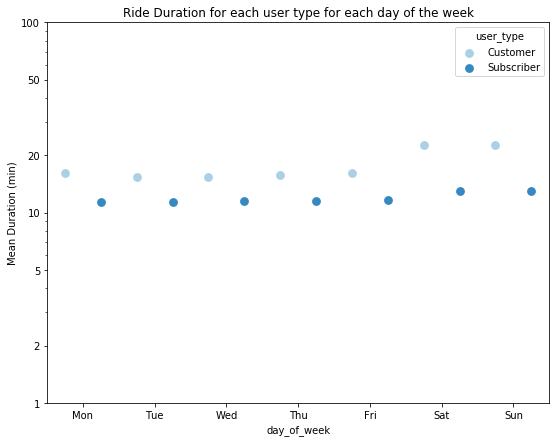

In [55]:
header = '7. `Day of Week` vs `Duration in Mins` vs `User Type`. <br /> - For each day of the week for last 12 months how does the average duration looks like for each user type?'
printmd(header, color='Blue')

fig = plt.figure(figsize = [9,7]);
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data = bike_df, x = 'day_of_week', y = 'duration_mins', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.5, order=weekday);
plt.title('Ride Duration for each user type for each day of the week');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

- We can see the duration for `Customer` is higher than the user type `Subscriber`.
- On the weekends, the gap of time spent on bike grows (could be due to more leisure riding)

<span style='color:Blue'>8. Post COVID-19: `Day of Week` vs `Duration in Mins` vs `User Type`. <br /> - For each day of the week for last few months since COVID-19 restrictions, how does the average duration looks like for each user type?</span>

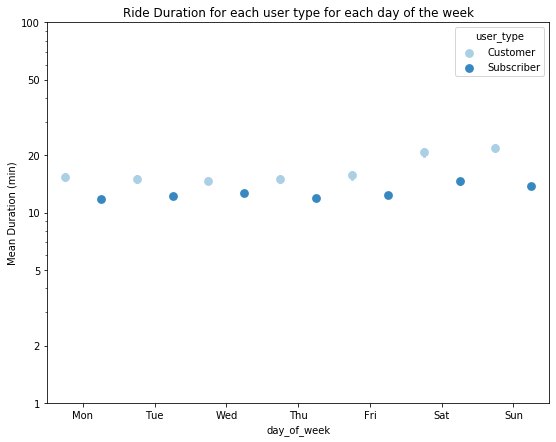

In [56]:
header = '8. Post COVID-19: `Day of Week` vs `Duration in Mins` vs `User Type`. <br /> - For each day of the week for last few months since COVID-19 restrictions, how does the average duration looks like for each user type?'
printmd(header, color='Blue')

fig = plt.figure(figsize = [9,7]);
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data = bike_df.query('month_year > "2020-02"'), x = 'day_of_week', 
                  y = 'duration_mins', hue = 'user_type', order=weekday,
                  palette = 'Blues', linestyles = '', dodge = 0.5);
plt.title('Ride Duration for each user type for each day of the week');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

- We can see the duration for `Customer` is higher than the user type `Subscriber`.
- Post COVID-19 the gap between the two users ride duration has reduced in comparison to Pre-COVID-19. 
- Weekend ride duration has also fallen. 

## Summary
> In the preceding visualisations we see the different users and their different way of accessing the bike, ride durations, peference for the biek type and also the impact of the COVID-19 onto each of the above visualisations and overall impact on the ridership of the Bay Wheels bike.

### Thank You!


#### Please reach out to `simer_anand88@yahoo.co.in` for any questions.